In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
% matplotlib inline
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Matplotlib is building the font cache; this may take a moment.
UsageError: Line magic function `%` not found.


In [4]:



#import data
heart = pd.read_csv("Heart.csv")

# Data Preparation

In [5]:
heart.head(7)

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes


<AxesSubplot:xlabel='AHD', ylabel='count'>

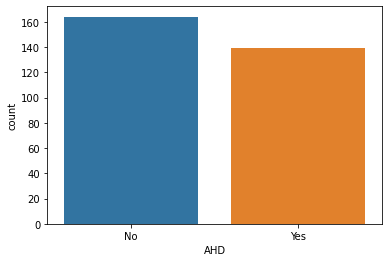

In [6]:
sns.countplot(x="AHD", data=heart)

<AxesSubplot:xlabel='AHD', ylabel='count'>

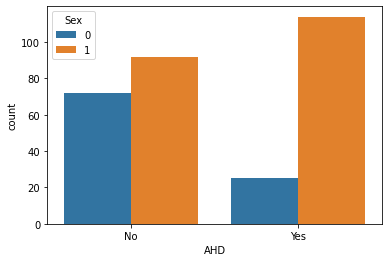

In [7]:
sns.countplot(x="AHD", hue="Sex", data= heart)

<AxesSubplot:xlabel='AHD', ylabel='count'>

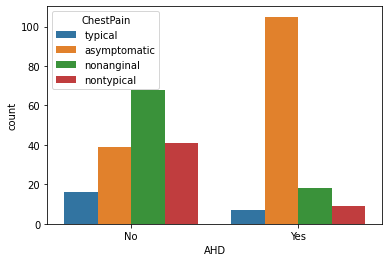

In [8]:
sns.countplot(x="AHD", hue="ChestPain", data=heart)

<AxesSubplot:ylabel='Frequency'>

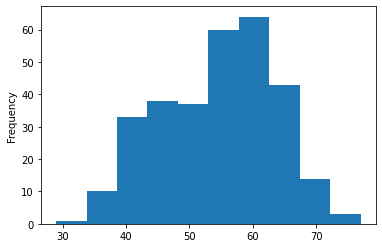

In [9]:
heart["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

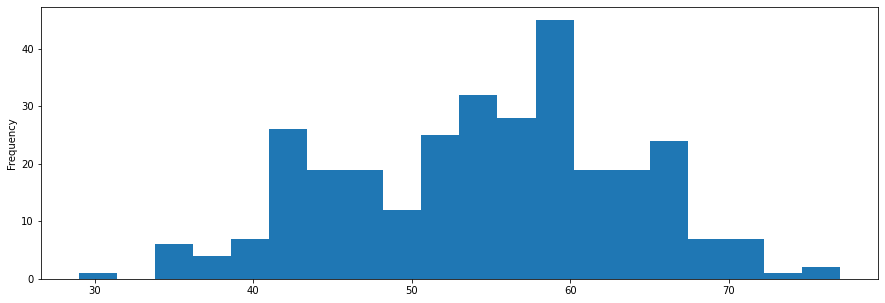

In [10]:
heart["Age"].plot.hist(bins=20, figsize=(15,5))

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_Id  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [12]:
heart.isnull().sum()

Patient_Id    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

<AxesSubplot:xlabel='AHD', ylabel='Age'>

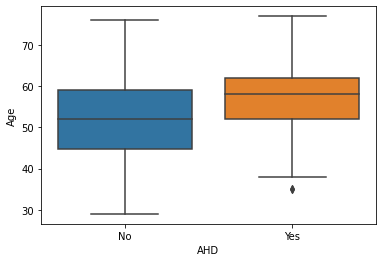

In [13]:
sns.boxplot(x="AHD", y="Age", data=heart)

<AxesSubplot:xlabel='Ca', ylabel='count'>

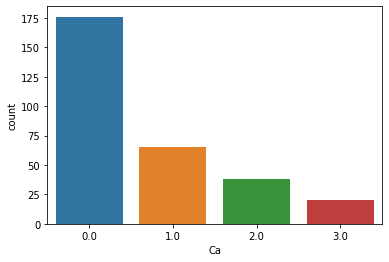

In [14]:
sns.countplot(x="Ca", data=heart)

In [15]:
heart2 = heart.dropna()

<AxesSubplot:xlabel='Ca', ylabel='count'>

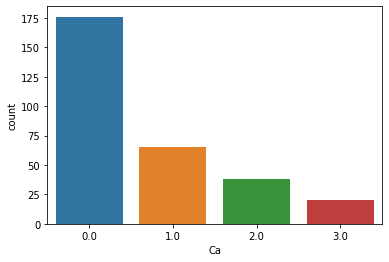

In [16]:
sns.countplot(x="Ca", data=heart)

In [17]:
heart2.isnull().sum()

Patient_Id    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

<AxesSubplot:xlabel='Thal', ylabel='count'>

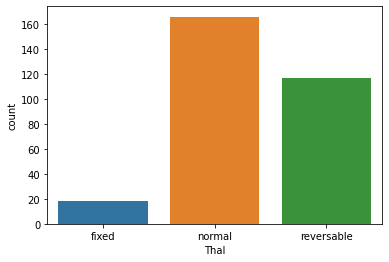

In [18]:
sns.countplot(x="Thal", data=heart)

In [19]:
pd.get_dummies(heart['ChestPain'])

,asymptomatic,nonanginal,nontypical,typical
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,1,0,0,0
300,1,0,0,0
301,0,0,1,0


In [20]:
ChestPain_mv = pd.get_dummies(heart['ChestPain'], prefix="ChestPain", prefix_sep ='_')

In [21]:
heart.head(5)

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [22]:
Thal_mv = pd.get_dummies(heart['Thal'], prefix="Thal", prefix_sep ='_')

In [70]:
heart_mv = pd.concat([heart, ChestPain_mv, Thal_mv], axis=1)

In [71]:
heart_mv.head(7)

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,Ca,Thal,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,typical,145,233,1,2,150,0,...,0.0,fixed,No,0,0,0,1,1,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,...,3.0,normal,Yes,1,0,0,0,0,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,...,2.0,reversable,Yes,1,0,0,0,0,0,1
3,4,37,1,nonanginal,130,250,0,0,187,0,...,0.0,normal,No,0,1,0,0,0,1,0
4,5,41,0,nontypical,130,204,0,2,172,0,...,0.0,normal,No,0,0,1,0,0,1,0
5,6,56,1,nontypical,120,236,0,0,178,0,...,0.0,normal,No,0,0,1,0,0,1,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,...,2.0,normal,Yes,1,0,0,0,0,1,0


In [72]:
heart_mv.drop(['ChestPain', 'Thal'],axis=1,inplace=True)

In [73]:
heart_mv.head(7)

,Patient_Id,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,1,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,1,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,0,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,0,1,0,0,1,0
5,6,56,1,120,236,0,0,178,0,0.8,1,0.0,No,0,0,1,0,0,1,0
6,7,62,0,140,268,0,2,160,0,3.6,3,2.0,Yes,1,0,0,0,0,1,0


In [74]:
heart_mv.isnull().sum()

Patient_Id                0
Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        4
AHD                       0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
dtype: int64

In [75]:
heart_mv2 = heart_mv.dropna()

In [33]:
heart_mv2.isnull().sum()

Patient_Id                0
Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        0
AHD                       0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
AHD                       0
dtype: int64

In [76]:
heart_mv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 301
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_Id              299 non-null    int64  
 1   Age                     299 non-null    int64  
 2   Sex                     299 non-null    int64  
 3   RestBP                  299 non-null    int64  
 4   Chol                    299 non-null    int64  
 5   Fbs                     299 non-null    int64  
 6   RestECG                 299 non-null    int64  
 7   MaxHR                   299 non-null    int64  
 8   ExAng                   299 non-null    int64  
 9   Oldpeak                 299 non-null    float64
 10  Slope                   299 non-null    int64  
 11  Ca                      299 non-null    float64
 12  AHD                     299 non-null    object 
 13  ChestPain_asymptomatic  299 non-null    uint8  
 14  ChestPain_nonanginal    299 non-null    ui

<AxesSubplot:>

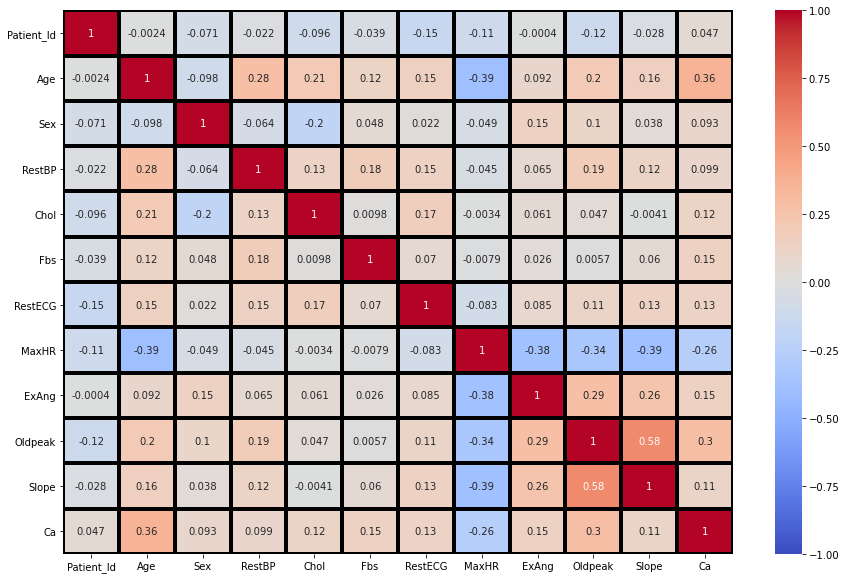

In [77]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(heart.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',ax=ax)

# Partition Dataset into: Training & Validation Subsets.

In [78]:
# To make it easier to manage the Training & Validation Subsets we're about to create lets first break the columns into 2 
# subsets: X representing the list of independent variables, and Y representing the dependent variable.

In [79]:
X = heart_mv2.drop("AHD", axis=1)
Y = heart_mv2["AHD"]

In [80]:
X.head(5)

,Patient_Id,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [81]:
# X looks good, it no longer contains our target dependent variable, AHD.  However, X includes the Patient_Id column/variable.  
# Is there any predictive power for a patient_id? Not really.  This is just an Id field that we can use to identify unique patients.
# An id should not impact the outcome, AHD.  Lets go ahead and drop it from X.

In [82]:
X = X.drop("Patient_Id", axis=1)

In [83]:
X.head(5)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [84]:
Y.head(5)

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

In [85]:
X_tr, X_val, Y_tr, Y_val = train_test_split(X,Y, test_size=.23, random_state=77)

# Decision Tree

In [86]:
# Import Decision-Tree related libraries 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve

import sklearn as skl
#from sklearn.tree import plot_tree



In [87]:
model_dt1 = DecisionTreeClassifier(criterion='entropy', random_state=100,
                                  max_depth=7, min_samples_leaf=25)

In [88]:
model_dt1.fit(X_tr, Y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=25,
                       random_state=100)

In [89]:
# Decision Tree parameters displayed above provide you with opportunities to experiment 
#with different model variations.

In [90]:
# The Decision Tree Classifier comes with additional attributes that describe additional characteristics.
# Here are a few examples.

In [91]:
model_dt1.classes_

array(['No', 'Yes'], dtype=object)

In [92]:
model_dt1.n_classes_

2

In [93]:
model_dt1.n_features_

18

In [94]:
model_dt1.max_features_

18

In [95]:
#  Feature importance indicates how much each input variable (or feature) contributes to overall quality 
#  of the decision tree model.  In other words, how much information gain is each feature contributing 
#  to the model.
model_dt1.feature_importances_

array([0.08185565, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22981443, 0.16652055, 0.        , 0.        , 0.        ,
       0.        , 0.52180937, 0.        ])

In [96]:
#  We see many features with 0 importance.  What does that mean?  That means these features did not contribute
#  any information gain (or value) to the model created.
#  How do I find out which features are important?  Look at the column names or features in your input variable list 
#  provided to train the model.

In [97]:
X_tr.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable'],
      dtype='object')

In [98]:
# To make this a little more readable, you could combine the variable names and importance into a dataframe... 

In [99]:
input_features = X_tr.columns
feature_importance = model_dt1.feature_importances_
dt1_feature_list = pd.Series(feature_importance, input_features)

In [100]:
dt1_feature_list

Age                       0.081856
Sex                       0.000000
RestBP                    0.000000
Chol                      0.000000
Fbs                       0.000000
RestECG                   0.000000
MaxHR                     0.000000
ExAng                     0.000000
Oldpeak                   0.000000
Slope                     0.000000
Ca                        0.229814
ChestPain_asymptomatic    0.166521
ChestPain_nonanginal      0.000000
ChestPain_nontypical      0.000000
ChestPain_typical         0.000000
Thal_fixed                0.000000
Thal_normal               0.521809
Thal_reversable           0.000000
dtype: float64

<AxesSubplot:>

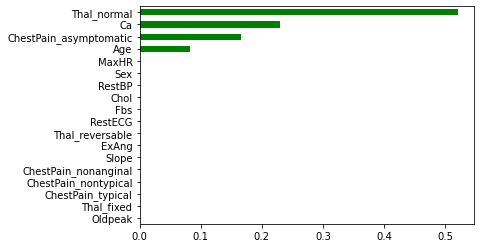

In [101]:
dt1_feature_list.sort_values().plot.barh(color='green')

In [102]:
#  Although we provided the model with 18 input variables, only 4 turned out to be important in this particular model.
#  This is an example of how predictive models help us focus on important features through data reduction!

In [64]:
# **********************  Potential Error when you use the plot_tree() function below  **********************
# Ensure you have the latest version of sklearn library installed... run this to find out library version: 
#                                          print(skl.__version__)
# The "plot_tree() function below is available in version 0.21.0 or beyond"

In [65]:
print(skl.__version__)

0.23.2


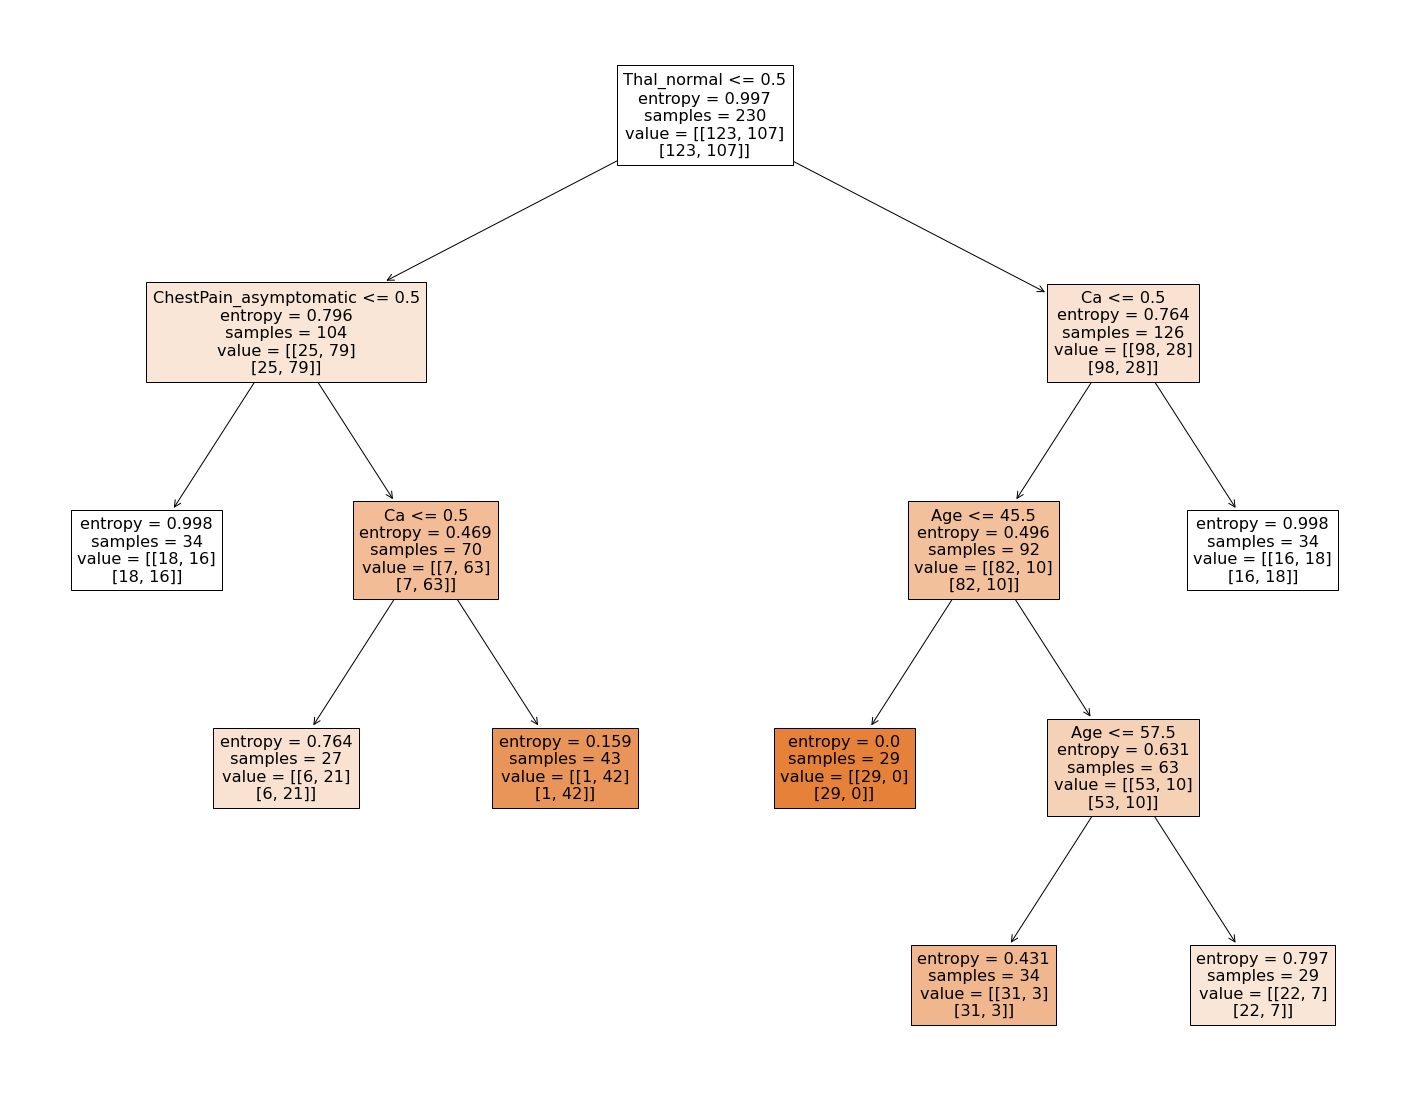

In [66]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, 
                   feature_names=input_features,  
                   class_names= "AHD",
                   filled=True)